/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48180 (\N{HANGUL SYLLABLE BAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54889 (\N{HANGUL SYLLABLE HWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


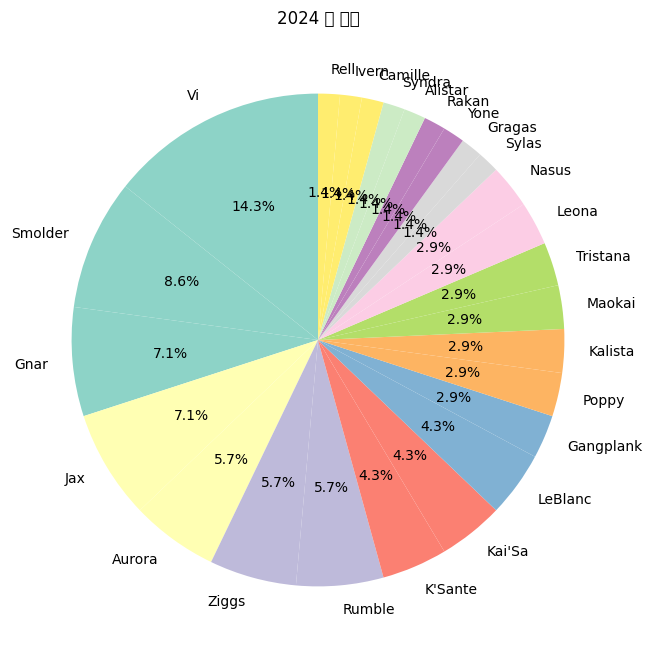

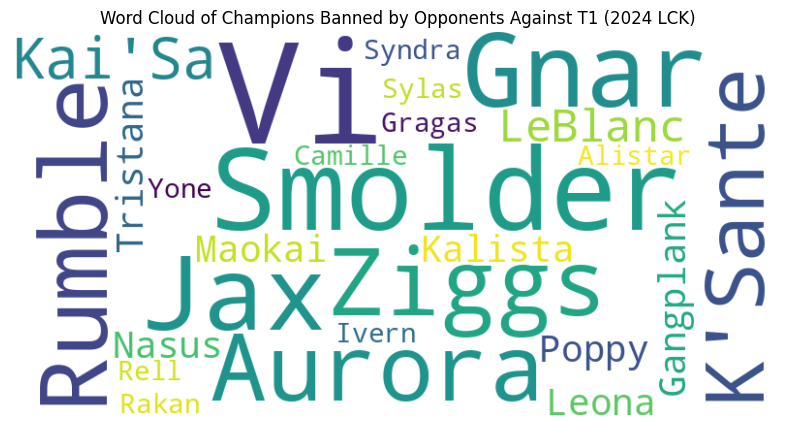

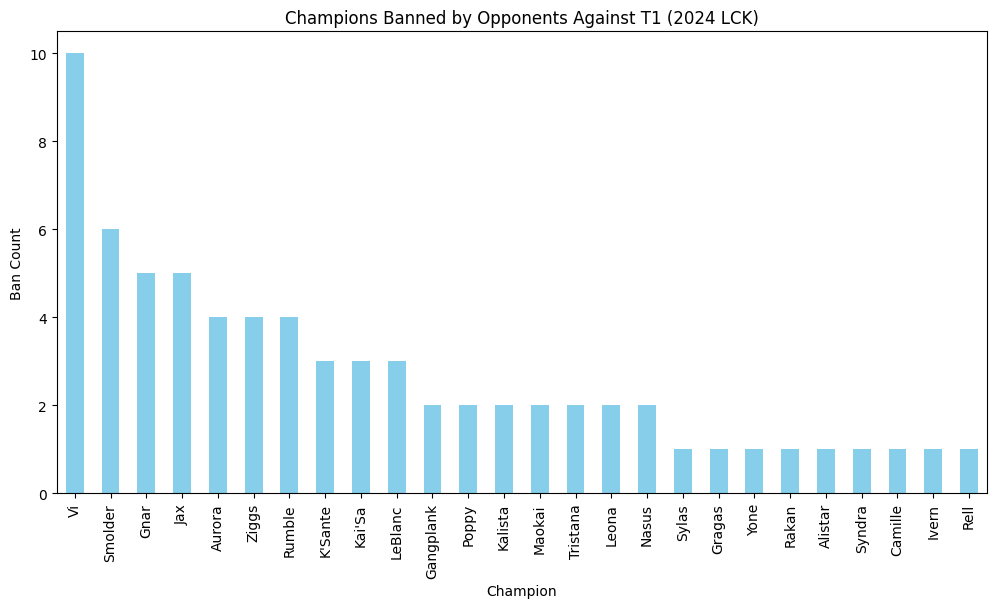

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

DATA_PATH = "/content/drive/MyDrive/datathon/data/"
df = pd.read_csv(f"{DATA_PATH}team.csv")

lck_2024_data = df[(df['year'] == 2024) & (df['league'] == 'WLDs')]

t1_bans = lck_2024_data[lck_2024_data['opp_teamname'] == 'Dplus KIA']

bans = t1_bans[['ban1', 'ban2', 'ban3', 'ban4', 'ban5']].values.flatten()

ban_counts = pd.Series(bans).value_counts()

#top_bans = ban_counts.head(10)

# 파이차트 그리기
plt.figure(figsize=(8, 8))
#top_bans.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
ban_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('2024 밴 현황')
plt.ylabel('')  # y축 레이블 제거
plt.show()

#워드차트
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ban_counts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('Word Cloud of Champions Banned by Opponents Against T1 (2024 LCK)')
plt.show()

#바차트
ban_counts = pd.Series(bans).value_counts()
plt.figure(figsize=(12, 6))
ban_counts.plot(kind='bar', color='skyblue')
plt.title('Champions Banned by Opponents Against T1 (2024 LCK)')
plt.xlabel('Champion')
plt.ylabel('Ban Count')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

In [22]:
filier_df = df[(df['year'] == 2024) & (df['league'] == 'LCK')]

df= filier_df[filier_df['opp_teamname'] == 'Dplus KIA']
# 각 용의 평균 획득량 계산
average_dragons = df[['infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs']].mean()

# 용의 영혼 완성 여부 계산 (dragons 컬럼이 4 이상일 경우)
df['soul_completed'] = df['dragons'] >= 4

# 용의 영혼 완성율 계산
soul_completion_rate = df['soul_completed'].mean()

# 출력
print("Average Dragon Acquisition:")
print(average_dragons)
print(f"\nSoul Completion Rate: {soul_completion_rate * 100:.2f}%")

Average Dragon Acquisition:
infernals   NaN
mountains   NaN
clouds      NaN
oceans      NaN
chemtechs   NaN
hextechs    NaN
dtype: float64

Soul Completion Rate: nan%


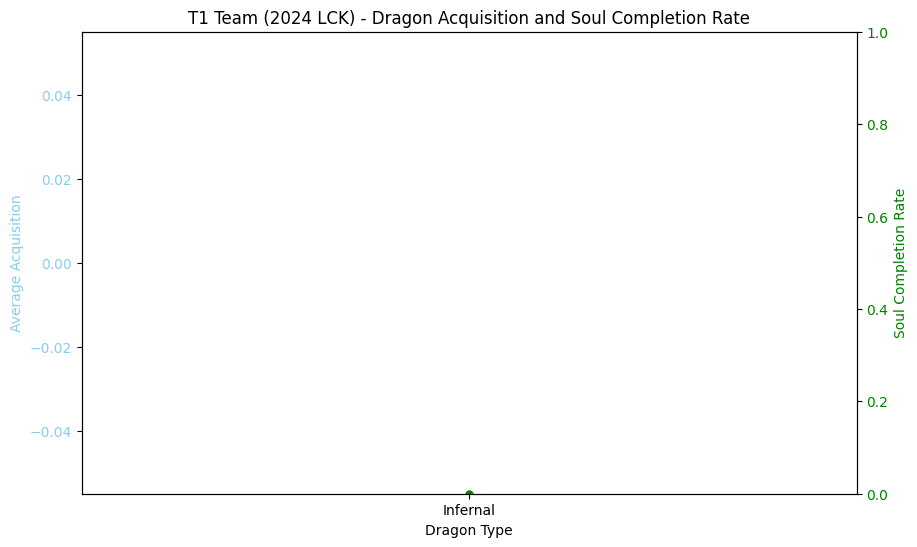

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


filier_df = df[(df['year'] == 2024) & (df['league'] == 'LCK')]

team_df= filier_df[filier_df['opp_teamname'] == 'FEARX']

# 각 용의 평균 획득량 계산 (T1 팀만)
average_dragons_t1 = team_df[['infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs']].mean()

# T1 팀의 용의 영혼 완성 여부 계산
team_df['soul_completed'] = team_df['dragons'] >= 4

# T1 팀의 용의 영혼 완성율 계산
soul_completion_rate_t1 = team_df['soul_completed'].mean()

# 시각화를 위한 데이터 준비
dragon_types = ['Infernal', 'Mountain', 'Cloud', 'Ocean', 'Chemtech', 'Hextech']
average_dragons = average_dragons_t1.values

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 그래프: 각 용의 평균 획득량
sns.barplot(x=dragon_types, y=average_dragons, ax=ax1, color='skyblue')
ax1.set_xlabel("Dragon Type")
ax1.set_ylabel("Average Acquisition", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 두 번째 축: 용의 영혼 완성율
ax2 = ax1.twinx()
ax2.plot([0, 5], [0, soul_completion_rate_t1], color='green', linestyle='-', marker='o', markersize=5, label="Soul Completion Rate")
ax2.set_ylabel("Soul Completion Rate", color='green')
ax2.set_ylim(0, 1)  # 완성율은 0과 1 사이로 설정
ax2.tick_params(axis='y', labelcolor='green')

# 타이틀 추가
plt.title("T1 Team (2024 LCK) - Dragon Acquisition and Soul Completion Rate")

# 그래프 출력
plt.show()
